In [48]:
import math
import pandas as pd
import numpy as np
import typing

desired_age_difference = 4

def original_calculate_age_distance(
  desired_age_difference: int,
  age_range: int,
  local_age:int,
  incoming_age: int) -> float:
    """Calculate the age distance between a local student and an incoming student.

    This function computes the absolute difference in ages between the two students,
    adjusts it based on a desired age difference from the configuration, and scales
    the result using the factorial of the age difference and the provided age range.

    :param config: A ConfigParser object containing configuration parameters, including the desired age difference.
    :param age_range: An integer representing the range of ages used for scaling the distance.
    :param local_students: A pandas Series representing the local student's attributes, including their age.
    :param incoming_student: A pandas Series representing the incoming student's attributes, including their age.
    :return: A float representing the scaled distance between the ages of the two students.
    """

    age_difference = abs(int(local_age) - int(incoming_age))

    age_difference -= desired_age_difference

    # Scale age difference using factorial
    age_difference_distance = math.factorial(age_difference) if age_difference > 0 else 0

    # age_difference_distance /= (math.factorial(self.age_range) * age_multiplier)
    age_difference_distance = float(age_difference_distance / (math.factorial(age_range)))

    if age_difference_distance == 0:
        print("buggy age distance calculation")
        print(local_age, incoming_age, age_difference, age_difference_distance)

    return age_difference_distance



def sigmoid(x: float) -> float:
    return 1 / (1 + math.exp(-x))    


def calculate_age_distance(
  optimal_age_difference: int,
  local_age: float,
  incoming_age: float) -> float:
  age_difference = abs(int(local_age) - int(incoming_age))
  return sigmoid(age_difference/ optimal_age_difference)




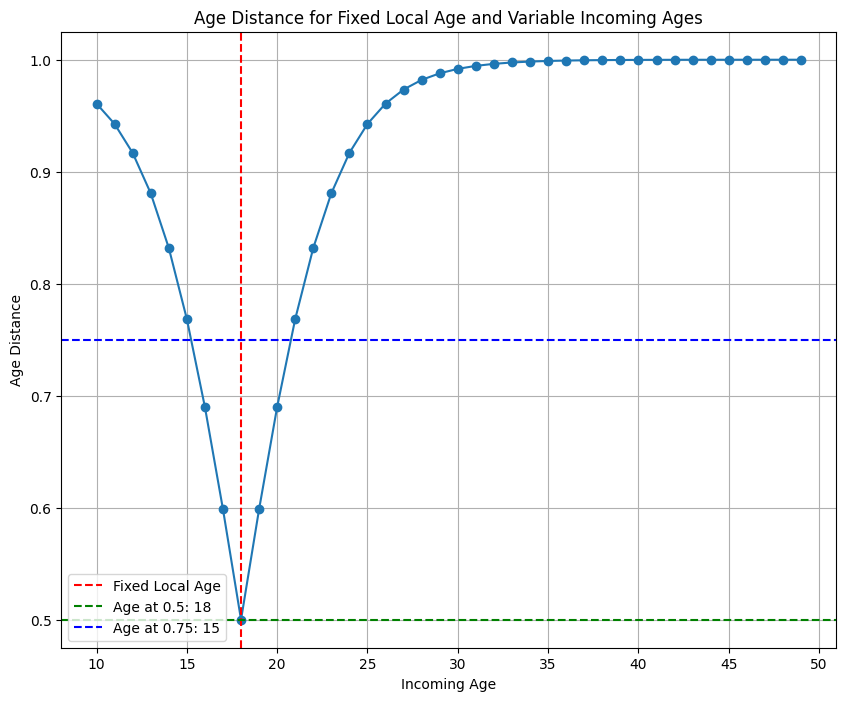

In [49]:
import matplotlib.pyplot as plt
# Define a fixed age for the local student
fixed_local_age = 18

optimal_age_difference = 2.5

# Define a range of ages for incoming students
incoming_ages = np.arange(10, 50)

# Calculate age distances for the fixed local age and all incoming ages
age_distances = np.vectorize(calculate_age_distance)(optimal_age_difference, fixed_local_age, incoming_ages)

age_distances_original = np.vectorize(original_calculate_age_distance)(desired_age_difference, 40, fixed_local_age, incoming_ages)

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(incoming_ages, age_distances, marker='o')

#plot fixed age 
plt.axvline(x=fixed_local_age, color='r', linestyle='--', label='Fixed Local Age')

# Show the age at 0.5 and at 0.75
age_at_0_5 = incoming_ages[np.argmin(np.abs(age_distances - 0.5))]
age_at_0_75 = incoming_ages[np.argmin(np.abs(age_distances - 0.75))]

plt.axhline(y=0.5, color='g', linestyle='--', label=f'Age at 0.5: {age_at_0_5}')
plt.axhline(y=0.75, color='b', linestyle='--', label=f'Age at 0.75: {age_at_0_75}')
plt.legend()
plt.xlabel('Incoming Age')
plt.ylabel('Age Distance')
plt.title('Age Distance for Fixed Local Age and Variable Incoming Ages')
plt.grid(True)
plt.show()
